#San Diego & San Fransisco Housing Affordability Gap

**Team Members and File Information**

Team Number: 5

Team Member: Yashaswini Reddy, Gurveen Rekhi, Aryan Jain, Tae Yoon Kim, Xiaoxuan Zhu

Project Manager:Yashaswini Reddy

**File Name:** `A05-Housing-Affordability.ipynb`

---

**Project Proposal**

**Problem Statement:** Housing affordability is a critical economic and social challenge in San Diego, where median home prices significantly outpace median household incomes. This project aims to quantify this disparity by creating a Housing Affordability Gap at the ZIP code level.

**Goal:** To analyze the relationship between property characteristics (size, beds/baths), listing price, and local income to determine where housing is most and least accessible in San Diego County. The findings will provide data-driven insights for prospective buyers and policymakers.

Data Sources:

Reality.com (http://reality.com/) -
https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

United States Census Bereau - https://data.census.gov/table?q=california+income


# Team Assignment Phase Reflection
In the previous team assignment phase, we found that affordability gaps remain sizeable in the San Diego housing market, with many households unable to meet the affordability benchmark despite higher incomes in certain areas. We also found that property size is closely related to housing price, confirming that larger homes tend to carry a premium cost.

*Graph 1* reveals a clear positive relationship between house size and price. Larger square footage generally correlates with higher prices.

*Graph 2* tries to find San Diego ZIP Codes with the Largest Housing Affordability Gaps, showing that 91905,92119, and 92024 had the most significant gaps, exceeding the affordability threshold.

*Graph 3* is designed to find 15 ZIP Codes with the highest average house Price and illustrates a markedly elevated housing market in 93624.

*Graph 4* shows the relationship between the number of bedrooms and the price per square foot: the median price per square foot stays the same until the number of bedrooms approaches 8. Starting at 8 bedrooms, the median price per square foot decreases with every subsequent increase in bedroom number.

*Graph 5* demonstrates the distribution of Price per Square Foot in San Diego, and we found that a significantly higher number of homes are available in the 500 dollars/sqft to 750 dollars/sqft range. Home buyers should expect to pay in this bracket for this time period.

During the team assignment we were only focused on San Diego, but now we added San Francisco to our analysis. Giving us another city to focus on and compare metrics against.

# Introduction and Motivation

In recent years, housing affordability has become a critical concern across major U.S. metropolitan areas. Many metropolitan areas have witnessed rapid price growth over the past decade, making home ownership increasingly out of reach for average families. Median home prices have surged in the past decade, while local wage growth has stagnated, making it increasingly difficult for young professionals and families to enter the housing market.

This affordability crisis is not merely a financial issue but also a social one. As more residents are priced out of urban centers, the city faces challenges related to inequality, urban sprawl, and access to essential services. Understanding how home prices vary by neighborhood, and how they relate to income levels is crucial for both public policy and long-term urban planning.

In this project, we combine data from census with the kaggle data to determine a Housing Affordability Gap for San Diego and San Francisco. By examining price per square foot, median income, and property characteristics such as number of bedrooms, we identify patterns that help explain which ZIP codes are most and least accessible to average households.

Our motivation is to provide data-driven insights for policymakers, developers, and residents, highlighting where affordability gaps are most severe and suggesting where targeted interventions may be most effective.


# Executive Summary

Housing affordability has become a pressing challenge for young adults in San Diego and San Francisco, where high housing costs often outpace local incomes. This project aims to find the Housing Affordability Gap by comparing household incomes to average home prices and price-per-square-foot, providing a clear benchmark for evaluating affordability across different areas. Using real estate listings from Reality.com and income statistics from the U.S. Census Bureau, we examine how property size and features such as number of bedrooms or amenities affect affordability. Our analysis identifies which regions are most and least affordable, helping prospective homeowners better understand the financial position required to purchase a home. The findings also offer insights for policymakers and community stakeholders concerned with housing access and economic equity in San Diego.



#Mounting Google Drive


We start by mounting Google Drive so we can access the datasets stored there. This step links our
Google Drive to the Colab environment, allowing us to read files directly using file paths

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Dictionary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 91.1 MB/s eta 0:00:00


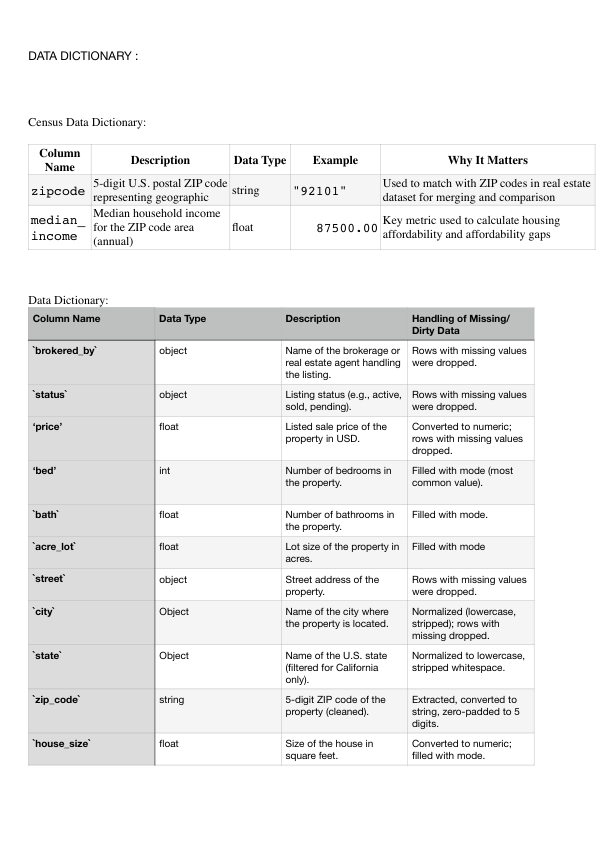

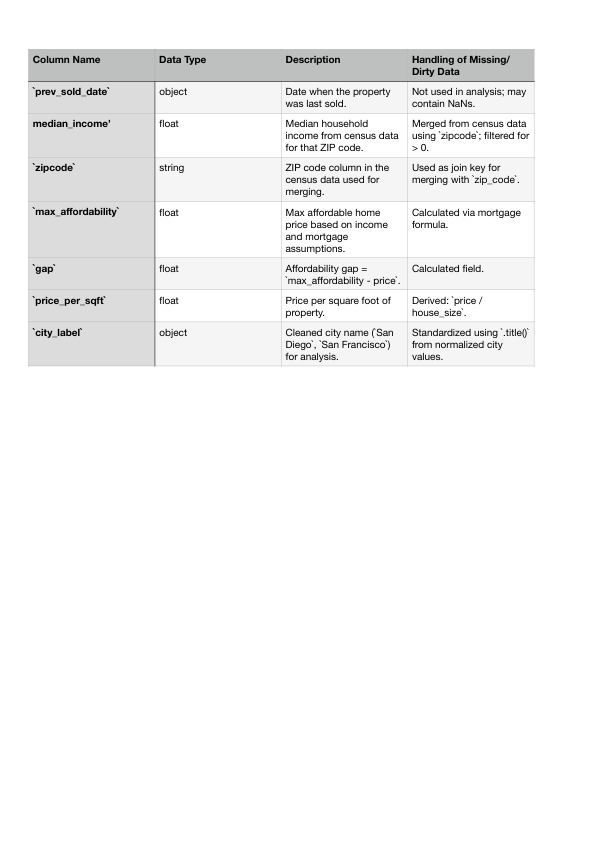

In [ ]:
!pip install pymupdf

import fitz  # PyMuPDF
from IPython.display import Image, display

pdf_path = "/content/drive/MyDrive/BA780/Datadictionary.pdf"
doc = fitz.open(pdf_path)

# Display first 2 pages
for page_number in range(min(2, len(doc))):
    page = doc.load_page(page_number)
    pix = page.get_pixmap()
    pix.save(f"page_{page_number}.png")
    display(Image(filename=f"page_{page_number}.png"))



##Reading Data Files
We're importing our primary datasets:

 • data.csv: Contains house listings with details like price, size, bedrooms, etc.

 • zipcodesmediansalary.csv: Contains income data per ZIP code from the US
Census

In [ ]:
    import pandas as pd
    file_path = '/content/drive/MyDrive/BA780/zipcodesmediansalary.csv'
    df= pd.read_csv('/content/drive/MyDrive/BA780/zipcodesmediansalary.csv')

In [ ]:
file_path = '/content/drive/MyDrive/BA780/data.csv'
df = pd.read_csv('/content/drive/MyDrive/BA780/data.csv')

# Importing Data



##Basic Library Imports + Data Preview
 We import essential libraries:

 • pandas for data manipulation,

 • numpy for numerical operations,

 • matplotlib.pyplot for plotting.

 Then, we preview the first 5 rows using df.head() to confirm the dataset has loaded correctly.

In [ ]:
#import all required libraties including matplot for plotting later on
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df.head() # asking to show  the first 5 rows so I can make sure it loaded right
#print(len(df.price))

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


#ZIP Code Value Counts
 We check how many homes are listed in each ZIP code using value_counts() on the  zip_code column. This helps us understand the distribution and identify ZIP codes with a significant number of listings for analysis.

In [ ]:
df['zip_code'].value_counts()

# asking it how many homes are in each zip code


,count
zip_code,
33993.0,2472
33981.0,2282
33974.0,1996
33160.0,1718
32909.0,1707
...,...
88419.0,1
88250.0,1
26675.0,1


#Load and Clean Census Data

 • We Load the **census income file**, and **Remove the first row (which contains non-data notes)**, we then **Reset the index for proper alignment**.

 • We Rename confusing column names (B19013_001E to median_income).

 • We Extract 5-digit ZIP codes using regex,  and then Convert ZIP codes to strings padded with leading zeros (ensures correct format).

 • We are also Converting the median_income column to numeric for calculations.


In [ ]:
census = pd.read_csv('/content/drive/MyDrive/BA780/zipcodesmediansalary.csv')
census = census.drop(census.index[0])
census = census.reset_index(drop=True)

census.head()
#Opening the file with median salaries by zip code and sorting it into a table called census
#Removed the first row cause it had a notes row at the top.


,GEO_ID,NAME,B19013_001E,B19013_001M,Unnamed: 4
0,860Z200US00601,ZCTA5 00601,18571,1365,NaN
1,860Z200US00602,ZCTA5 00602,21702,2026,NaN
2,860Z200US00603,ZCTA5 00603,19243,1444,NaN
3,860Z200US00606,ZCTA5 00606,20226,3619,NaN
4,860Z200US00610,ZCTA5 00610,23732,1614,NaN


In [ ]:
census_clean = census.rename(columns={
    "NAME": "area_name",
    "B19013_001E": "median_income"
})
census_clean["zipcode"] = census_clean["area_name"].str.extract(r"ZCTA5 (\d{5})")

census_clean = census_clean[["zipcode", "median_income"]]
census_clean["zipcode"] = census_clean["zipcode"].astype(str).str.zfill(5)
census_clean["median_income"] = pd.to_numeric(census_clean["median_income"], errors="coerce")
print(census_clean.head())

census_clean['zipcode'].value_counts()


  zipcode  median_income
0   00601        18571.0
1   00602        21702.0
2   00603        19243.0
3   00606        20226.0
4   00610        23732.0


,count
zipcode,
99929,1
00601,1
00602,1
00603,1
00606,1
...,...
00638,1
00637,1
00636,1


#Maping Median Income into House Listing Dataset

We **map the median income** from the census dataset into our house listings based on ZIP code using df['zip_code'].map(...).

We use map() as It allows us to create a direct lookup — each house record will now include the income associated with its ZIP code.

 Why median income, not mean or mode:

 • **Median** is more robust to **outliers** (very high or low incomes).

 • **Mean** could be skewed by billionaires or poverty clusters.

 • **Mode** is usually irrelevant for income (rarely repeated).

Median better reflects what a *typical* household earns.

In [ ]:
df['zip_code'] = df['zip_code'].apply(lambda x: str(int(x)).zfill(5) if pd.notna(x) else None)


census_clean['zipcode'] = census_clean['zipcode'].astype(str).str.zfill(5)

df['median_income'] = df['zip_code'].map(census_clean.set_index('zipcode')['median_income'])


#Filter for California Only

We keep only those listings where the state is **California**. Since our study focuses on **San Diego and San Francisco**, this ensures we only analyze relevant data.

In [ ]:
df.head()
df = df[df['state'] == 'California']

# we are filtering and keeping only those rows where the state column is "California"

#Missing Data Check

To assess data quality we check for missing data:

In [ ]:
missing = df.isna().sum()*100 / len(df)
print('perc of missing values %')
missing



perc of missing values %


,0
brokered_by,0.286513
status,0.000000
price,0.014524
bed,13.673833
bath,14.555817
acre_lot,10.112889
street,0.349449
city,0.051933
state,0.000000
zip_code,0.009242


#Handling Missing Values Using Mode

This step fills missing values in important columns using the mode (most frequent value). We use mode instead of mean or median here because:

 • For categorical or discrete features like bed, bath, and acre_lot, mode best
captures the most common configuration.

 • For numerical columns like house_size, mode is used as a safe fallback assuming most
houses follow standard sizing (e.g., 1500 sq.ft being very common).

 • Finally, we use dropna() only for critical columns like income and price, where we cannot assume or impute missing values without distorting the data.

In [ ]:
df['acre_lot'].fillna(df['acre_lot'].mode()[0], inplace=True)
#checks the acre_lot column and finds its most common value (mode()[0]).
#Filling any missing spots in acre_lot with that most common value.

df['bed'].fillna(df['bed'].mode()[0], inplace=True)
df['house_size'].fillna(df['house_size'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)
df.dropna(subset=['median_income','brokered_by','street' ,'price'] , inplace = True)
# we're basically doing the same thing for bed, hopuse size and bath


/tmp/ipython-input-980139503.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['acre_lot'].fillna(df['acre_lot'].mode()[0], inplace=True)
/tmp/ipython-input-980139503.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
df = df.dropna(subset=['zip_code','city'])


#Verifying Missing Data

This code calculates **the percentage of missing values** for each column. It helps us decide:

 Whether to fill, drop, or ignore a column and Whether our previous cleaning steps have eliminated all NaNs.
The result shows **0% missing** — indicating our dataset is now clean and ready for analysis.

In [ ]:
missing = df.isna().sum()*100 / len(df)

# this step basically helps to decide whether to drop a column, fill in gaps, or just leave it.
print('perc of missing values %')
missing



perc of missing values %


,0
brokered_by,0.00000
status,0.00000
price,0.00000
bed,0.00000
bath,0.00000
acre_lot,0.00000
street,0.00000
city,0.00000
state,0.00000
zip_code,0.00000


#Filtering to San Diego & San Francisco

We filtered the dataset to only include **California cities**, and then selected only **San Diego and San Francisco**.

• city_label is added to store the cleaned and properly capitalized city names.

• This step eliminates any formatting inconsistencies like extra spaces or varying capitalizations.

In [ ]:
# keeping only California rows
df = df[df['state'].astype(str).str.strip().str.lower().isin({'california', 'ca'})].copy()

# normalizing city names once
city_norm = df['city'].astype(str).str.strip().str.lower()

# filtering just SD & SF
keep = {'san diego', 'san francisco'}
df_sd_sf = df[city_norm.isin(keep)].copy()


df_sd_sf['city_label'] = city_norm[city_norm.isin(keep)].str.title().values  # "San Diego", "San Francisco"

#check
print(df_sd_sf['city_label'].value_counts())
print('rows:', len(df_sd_sf))



city_label
San Diego        7030
San Francisco    4589
Name: count, dtype: int64
rows: 11619


#Cleaning ZIP Codes for Both Cities

This code

 • Extracts **5-digit ZIP codes**. Removes *.0* from ZIPs stored as float (e.g., 92105.0) and zero-pads ZIPs like *9411 → 09411*.

 • The cleaned ZIP lists (sd_zipcodes, sf_zipcodes) are now reliable identifiers for location-specific analysis.

In [ ]:
# normalize city names once
city_norm = df['city'].astype(str).str.strip().str.lower()

#  San Diego Zipcodes
mask_sd = city_norm.eq('san diego')
df_sd = df[mask_sd].copy()

sd_zipcodes = (
    df_sd['zip_code']
      .dropna()
      .astype(str)
      .str.replace(r'\.0$', '', regex=True)   # if some came in like 92101.0
      .str.extract(r'(\d{5})', expand=False)  # keep only 5 digits
      .str.zfill(5)
      .unique()
)
sd_zipcodes = sorted(sd_zipcodes)

print('San Diego zipcodes (n={}):'.format(len(sd_zipcodes)))
print(sd_zipcodes)

# --- San Francisco Zipcodes ---
mask_sf = df_sd_sf['city_label'] == 'San Francisco'
df_sf = df_sd_sf[mask_sf].copy()

sf_zipcodes = (
    df_sf['zip_code']
    .dropna()
    .astype(str)
    .str.replace(r'\.0$', '', regex=True)
    .str.extract(r'(\d{5})', expand=False)
    .str.zfill(5)
    .unique()
)
sf_zipcodes = sorted(sf_zipcodes)

print('\nSan Francisco zipcodes (n={}):'.format(len(sf_zipcodes)))
print(sf_zipcodes)




San Diego zipcodes (n=45):
['91905', '91941', '91942', '91950', '91977', '92014', '92024', '92025', '92037', '92054', '92064', '92071', '92078', '92082', '92101', '92102', '92103', '92104', '92105', '92106', '92107', '92108', '92109', '92110', '92111', '92113', '92114', '92115', '92116', '92117', '92119', '92120', '92121', '92122', '92123', '92124', '92126', '92127', '92128', '92129', '92130', '92131', '92139', '92154', '92173']

San Francisco zipcodes (n=26):
['94102', '94103', '94104', '94105', '94107', '94108', '94109', '94110', '94111', '94112', '94114', '94115', '94116', '94117', '94118', '94121', '94122', '94123', '94124', '94127', '94130', '94131', '94132', '94133', '94134', '94158']


#Cleaning and Merging Median Income Data

• We clean and convert median income to numeric form and drop any invalid or zero-income rows from the census dataset.

• Merging it with real estate data on ZIP code helps us compare **what people can afford (based on income)** versus **actual home prices**.


In [ ]:
# --- Clean up median_income in df2 if it already exists ---
if 'median_income' in df.columns:
    df = df.drop(columns=['median_income'])

# --- Clean median_income in census_clean ---
census_clean['median_income'] = pd.to_numeric(census_clean['median_income'], errors='coerce')
census_clean = census_clean.dropna(subset=['median_income'])
census_clean = census_clean[census_clean['median_income'] > 0]

# --- Merge real estate df2 with census_clean on zip code ---
df = df.merge(
    census_clean[['zipcode', 'median_income']],
    left_on='zip_code', right_on='zipcode',
    how='left'
)

# --- Mortgage helper function ---
def affordable_home_price(income, annual_interest=0.065, years=30, pct_income=0.3):
    """
    Calculate max affordable home price given income.
    Assumes 30% of monthly income goes to mortgage.
    """
    monthly_income = income / 12
    max_monthly_payment = monthly_income * pct_income
    n_payments = years * 12
    r = annual_interest / 12
    loan_amount = max_monthly_payment * ((1 - (1 + r) ** -n_payments) / r)
    return loan_amount

# --- Apply calculator to dataset ---
df['max_affordability'] = df['median_income'].apply(
    lambda x: affordable_home_price(x, annual_interest=0.065, years=30, pct_income=0.3)
)

# --- Compare affordability to actual home prices ---
df['gap'] = df['max_affordability'] - df['price']

# --- Check results ---
print(df[['zip_code','median_income','price','max_affordability','gap']].head(10))


  zip_code  median_income     price  max_affordability            gap
0    96121        87826.0  199000.0      347375.585917  148375.585917
1    92225        51294.0  199900.0      202881.644433    2981.644433
2    92225        51294.0  172999.0      202881.644433   29882.644433
3    92225        51294.0   79900.0      202881.644433  122981.644433
4    92225        51294.0   69000.0      202881.644433  133881.644433
5    92225        51294.0   75000.0      202881.644433  127881.644433
6    92225        51294.0  201000.0      202881.644433    1881.644433
7    92225        51294.0  119999.0      202881.644433   82882.644433
8    92225        51294.0  189900.0      202881.644433   12981.644433
9    92225        51294.0  250000.0      202881.644433  -47118.355567


#Calculating Affordability Gap

We use a realistic mortgage model to compute how much house people can afford based on their income (assuming 30% of income goes to housing).

The **affordability gap** = what they can afford – actual house price:

 • **Positive gap** = Affordable

 • **Negative gap** = Unaffordable

In [ ]:
# new mortgage helper function with the use of combined dataset

# --- Mortgage helper function ---
def affordable_home_price(income, annual_interest=0.065, years=30, pct_income=0.3):
    """
    Calculate max affordable home price given income.
    Assumes 30% of monthly income goes to mortgage.
    """
    monthly_income = income / 12
    max_monthly_payment = monthly_income * pct_income
    n_payments = years * 12
    r = annual_interest / 12
    loan_amount = max_monthly_payment * ((1 - (1 + r) ** -n_payments) / r)
    return loan_amount

# --- Apply calculator to combined dataframe df_sd_sf ---
df_sd_sf['max_affordability'] = df_sd_sf['median_income'].apply(
    lambda x: affordable_home_price(x, annual_interest=0.065, years=30, pct_income=0.3)
)

# --- Calculate affordability gap ---
df_sd_sf['gap'] = df_sd_sf['max_affordability'] - df_sd_sf['price']

# --- Optional: preview for debugging ---
print(df_sd_sf[['zip_code', 'city_label', 'median_income', 'price', 'max_affordability', 'gap']].head(70000))


        zip_code     city_label  median_income      price  max_affordability  \
1280054    92154      San Diego        90035.0   259900.0      356112.778426   
1280059    92154      San Diego        90035.0   250000.0      356112.778426   
1280061    92114      San Diego        90171.0   399000.0      356650.695212   
1280062    92115      San Diego        75178.0   760000.0      297349.324779   
1280063    92114      San Diego        90171.0  1499000.0      356650.695212   
...          ...            ...            ...        ...                ...   
2151179    94121  San Francisco       138353.0  2200000.0      547223.537885   
2151180    94121  San Francisco       138353.0  2745000.0      547223.537885   
2151181    94132  San Francisco       118557.0  1775000.0      468925.003296   
2151182    94122  San Francisco       145717.0  1295000.0      576350.149762   
2151186    94121  San Francisco       138353.0  6995000.0      547223.537885   

                  gap  
1280054  9.6212

#Finding Most and Least Affordable ZIP Codes

 • This code identifies the **ZIP code with highest affordability** (most surplus income after purchase) and the **least affordable ZIP** (where house price severely exceeds what people can afford).

 • These insights can guide **policy, urban planning**, or **housing aid efforts**

In [ ]:
# max gap (best case: most affordable)
max_gap_row = df.loc[df['gap'].idxmax(), ['zip_code','median_income','price','max_affordability','gap']]

# least gap (worst case: least affordable)
min_gap_row = df.loc[df['gap'].idxmin(), ['zip_code','median_income','price','max_affordability','gap']]

print("Max gap (most affordable):")
print(max_gap_row)

print("\nLeast gap (least affordable):")
print(min_gap_row)



Max gap (most affordable):
zip_code                     90077
median_income             220464.0
price                      12500.0
max_affordability    871994.752961
gap                  859494.752961
Name: 3412, dtype: object

Least gap (least affordable):
zip_code                        92119
median_income                115600.0
price                     515000000.0
max_affordability       457229.268462
gap                 -514542770.731538
Name: 32069, dtype: object


#Graph 1 & 2: Relationship Between House Size and Price

Question: What is the relationship between home price and size(sqft)?

Interpretation: The scatter plot reveals a clear positive relationship between house size and price. Larger square footage generally correlates with higher prices. Interestingly, homes around 1,500 sqft, a typical starter family size, appear across the entire spectrum, reaching up to $5 million.

Answer: In general, larger houses cost more, but the spread of points also suggests variability, which means that price is influenced by other factors beyond just size (e.g., location, age, neighborhood quality).

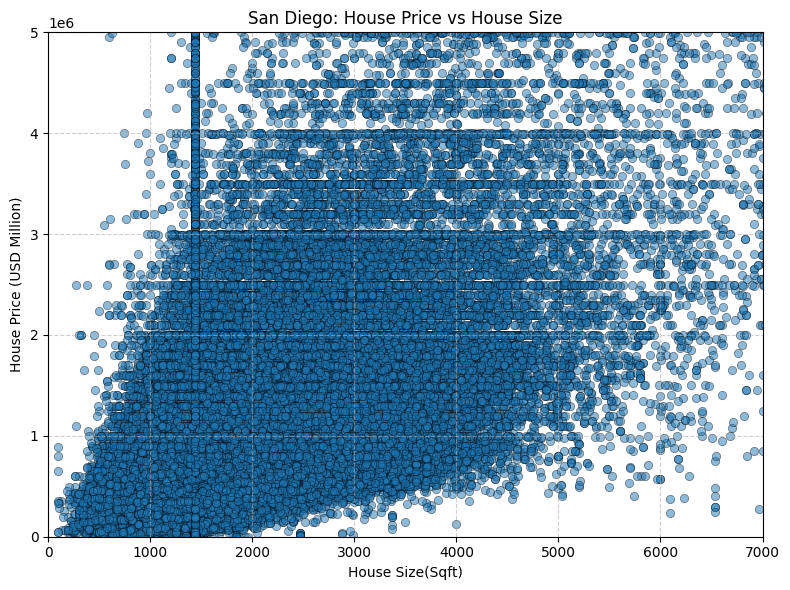

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(df['house_size'], df['price'],
            alpha=0.5, edgecolors='black', linewidths=0.5)

plt.ylim(0,5000000)
plt.xlim(0,7000)
plt.xlabel('House Size(Sqft)')
plt.ylabel('House Price (USD Million)')
plt.title('San Diego: House Price vs House Size')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


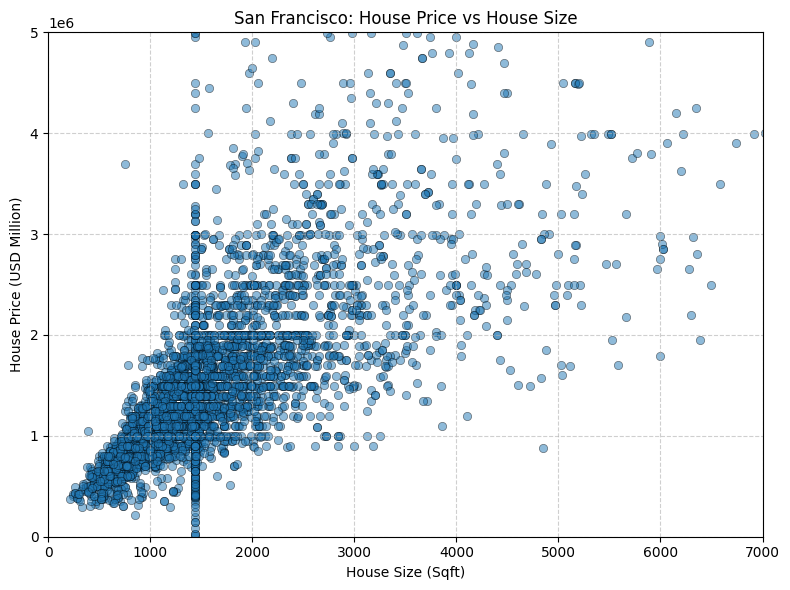

In [ ]:
import matplotlib.pyplot as plt

# Filter for San Francisco data
df_sf = df_sd_sf[df_sd_sf['city_label'] == 'San Francisco']

# Plot
plt.figure(figsize=(8,6))

plt.scatter(df_sf['house_size'], df_sf['price'],
            alpha=0.5, edgecolors='black', linewidths=0.5)

plt.ylim(0, 5_000_000)
plt.xlim(0, 7000)
plt.xlabel('House Size (Sqft)')
plt.ylabel('House Price (USD Million)')
plt.title('San Francisco: House Price vs House Size')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#Graph 3: Top ZIP Codes with the Largest Housing Affordability Gaps

Question: Which ZIP codes show the largest affordability gap between median household income and average home prices, and how does this impact potential buyers?

Interpretation: The affordability gap for each zip code was determined by calculating the difference between the average house price and the corresponding maximum affordability. The graph is resulting in showing that 91905,92119, and 92024 show the most significant gaps, exceeding the affordability threshold.

Answer: The resulting chart identifies the most unaffordable neighborhoods in San Diego, where housing prices are far beyond what residents can typically afford. These ZIP codes highlight regions with serious affordability challenges, useful for policymakers and real estate analysts to target potential housing support or policy interventions.

/tmp/ipython-input-2247574405.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values('avg_shortfall', ascending=False).head(10))


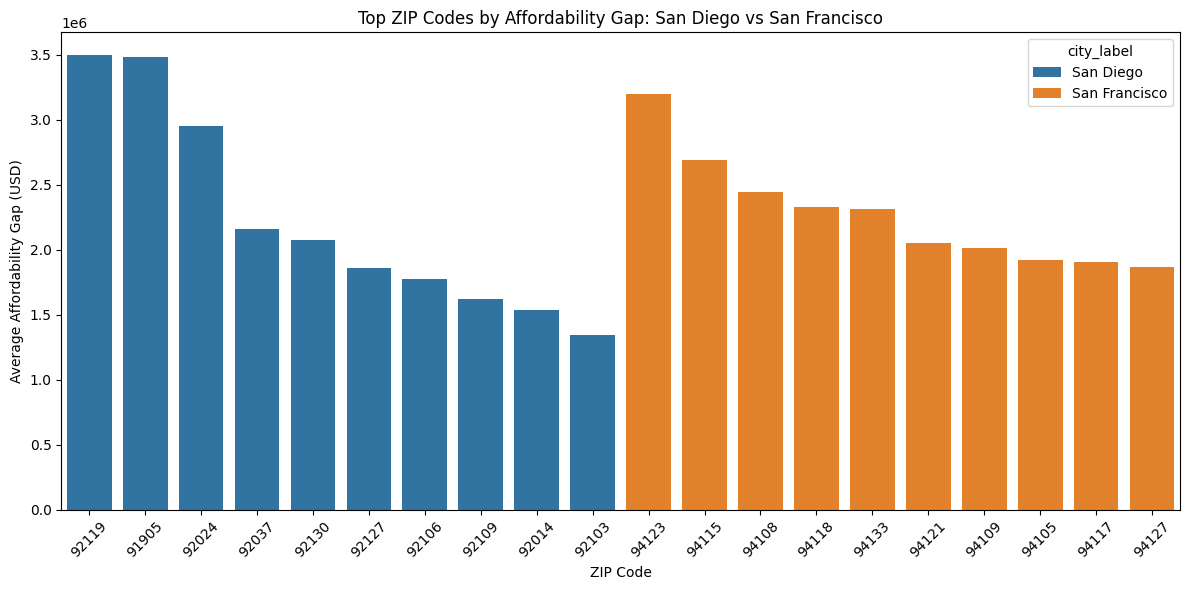

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sd_sf['max_affordability'] = df_sd_sf['median_income'] * 0.3

# calculate shortfall (San Diego & SF dataframe)
df_sd_sf['shortfall'] = df_sd_sf['price'] - df_sd_sf['max_affordability']

# group by city + ZIP and calculate average shortfall
by_zip = (
    df_sd_sf.groupby(['city_label', 'zip_code'], as_index=False)
    .agg(avg_shortfall=('shortfall', 'mean'))
)

# take top 15 ZIP codes by avg_shortfall per city
top_zip = (
    by_zip.groupby('city_label', group_keys=False)
    .apply(lambda x: x.sort_values('avg_shortfall', ascending=False).head(10))
)

# plot side-by-side bar chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top_zip, x='zip_code', y='avg_shortfall', hue='city_label')
plt.xlabel('ZIP Code')
plt.ylabel('Average Affordability Gap (USD)')
plt.title('Top ZIP Codes by Affordability Gap: San Diego vs San Francisco')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Graph 4

Question: What is the lowest gap in both cities?

Interpretation: The housing market in San Francisco is much less accessible than San Diego. There is a greater barrier for homeownership and divide in these neighborhoods.

Answer: San Diego has a lower gap of around 300k dollars for its lowest, but San Francisco is at 1 million dollars.


/tmp/ipython-input-3094136649.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values('avg_shortfall', ascending=False).tail(10))


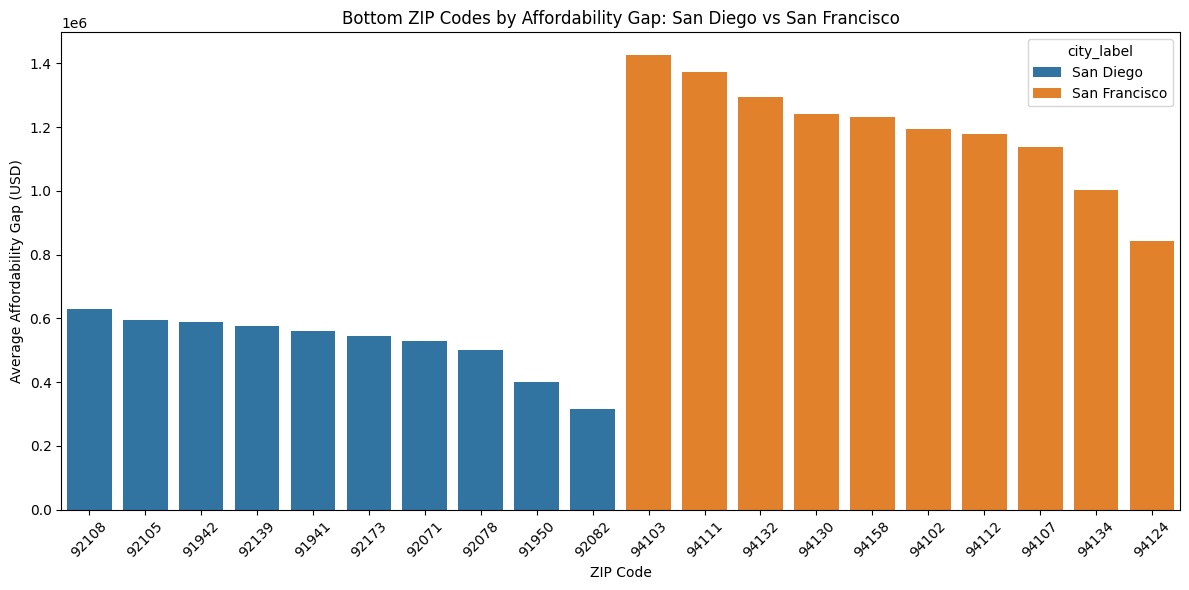

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sd_sf['max_affordability'] = df_sd_sf['median_income'] * 0.3

# calculate shortfall (San Diego & SF dataframe)
df_sd_sf['shortfall'] = df_sd_sf['price'] - df_sd_sf['max_affordability']

# group by city + ZIP and calculate average shortfall
by_zip = (
    df_sd_sf.groupby(['city_label', 'zip_code'], as_index=False)
    .agg(avg_shortfall=('shortfall', 'mean'))
)

# take top 10 ZIP codes by avg_shortfall per city
top_zip = (
    by_zip.groupby('city_label', group_keys=False)
    .apply(lambda x: x.sort_values('avg_shortfall', ascending=False).tail(10))
)

# plot side-by-side bar chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top_zip, x='zip_code', y='avg_shortfall', hue='city_label')
plt.xlabel('ZIP Code')
plt.ylabel('Average Affordability Gap (USD)')
plt.title('Bottom ZIP Codes by Affordability Gap: San Diego vs San Francisco')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Graph 5 & 6: Distribution of Price per Square Foot in San Diego vs San Franscisco
Question:
What is the distribution of home listings across different price-per-square-foot ranges, and where are the highest concentrations?

Interpretation:
The graphs shows a significantly higher number of homes available in the  $500-$750 per sqft range for San Diego. However, for San Francsico most of the home listed are around $750-$1000 per sqft.We can see that the house prices overall are higher in San Francisco than San Diego.The histogram illustrates the typical market range of property values per square foot in San Diego and San Francsico.

Answer:
Most listings likely cluster around a moderate price range, forming a right-skewed distribution (a few expensive outliers even after filtering). This visualization helps real estate analysts or buyers understand market density — identifying what’s considered “average,” and how common or rare luxury-priced homes are.

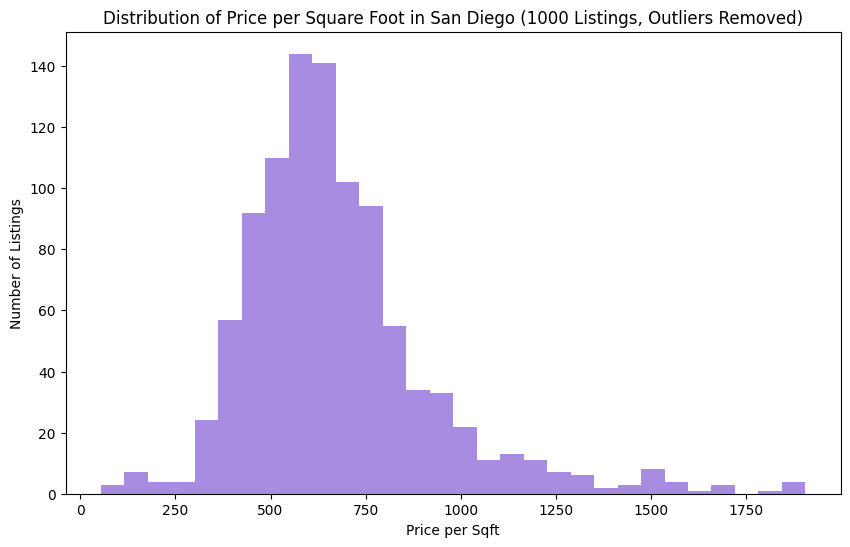

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = df.copy()
df['zip_code'] = df['zip_code'].astype(str).str.extract(r'(\d{5})', expand=False).str.zfill(5)
df = df[df['zip_code'].str.startswith('921')]   # San Diego only

df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['house_size'] = pd.to_numeric(df['house_size'], errors='coerce')

df = df.dropna(subset=['price','house_size'])
df = df[df['house_size'] > 0]


df['price_per_sqft'] = df['price'] / df['house_size']

#removing outliers
df_filtered = df[df['price_per_sqft'] < 2000]

# limit to 1000 random listings
df_limited = df_filtered.sample(n=1000, random_state=42)


plt.figure(figsize=(10,6))
plt.hist(df_limited['price_per_sqft'], bins=30, color='mediumpurple', alpha=0.8)

plt.title("Distribution of Price per Square Foot in San Diego (1000 Listings, Outliers Removed)")
plt.xlabel("Price per Sqft")
plt.ylabel("Number of Listings")

plt.show()


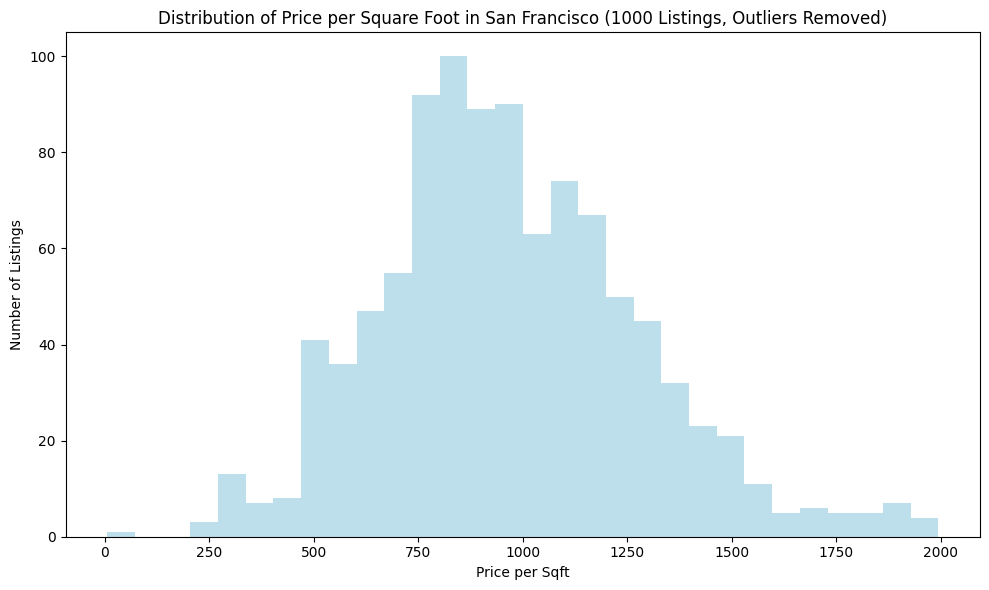

In [ ]:
df_sf = df_sd_sf[df_sd_sf['city_label'] == 'San Francisco'].copy()

# Extract and clean ZIP codes
df_sf['zip_code'] = df_sf['zip_code'].astype(str).str.extract(r'(\d{5})', expand=False)
df_sf = df_sf[df_sf['zip_code'].str.startswith('941')]

# Ensure numeric types
df_sf['price'] = pd.to_numeric(df_sf['price'], errors='coerce')
df_sf['house_size'] = pd.to_numeric(df_sf['house_size'], errors='coerce')

# Drop missing and invalid data
df_sf = df_sf.dropna(subset=['price', 'house_size'])
df_sf = df_sf[df_sf['house_size'] > 0]

# Calculate price per sqft
df_sf['price_per_sqft'] = df_sf['price'] / df_sf['house_size']

# Remove outliers
df_sf_filtered = df_sf[df_sf['price_per_sqft'] < 2000]

# Sample 1000 listings
df_sf_limited = df_sf_filtered.sample(n=1000, random_state=42)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_sf_limited['price_per_sqft'], bins=30, color='lightblue', alpha=0.8)

plt.title("Distribution of Price per Square Foot in San Francisco (1000 Listings, Outliers Removed)")
plt.xlabel("Price per Sqft")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()


##Graph 7 & 8: Correlation Matrix of Key Housing and Income Variables

Question: What metrics of a house in San Diego or San Francisco affect its price?

Interpretation: San Diego has a high correlation between price per sqft and price, as San Francisco is less correlated. In general, San Francisco has more factors influencing the correlation for price, as San Diego is mainly driven by the square footage of the home.

Answer: In San Diego, there is very little correlation between price and three factors: house size, number of bedrooms, and number of bathrooms. It is only correlated to price per square foot, which would suggest that another factor, such as location in San Diego, would be a determinant of house price, as price is derived from price per square foot already.
On the other hand, the physical aspects of a house have a greater effect on house prices in San Francisco than in San Diego. Price per square foot is also less correlated than it is in San Diego. This would also suggest that there is less regional price variance in San Francisco than in San Diego.


Text(0.5, 1.0, 'San Diego: Correlation Matrix of Key Housing')

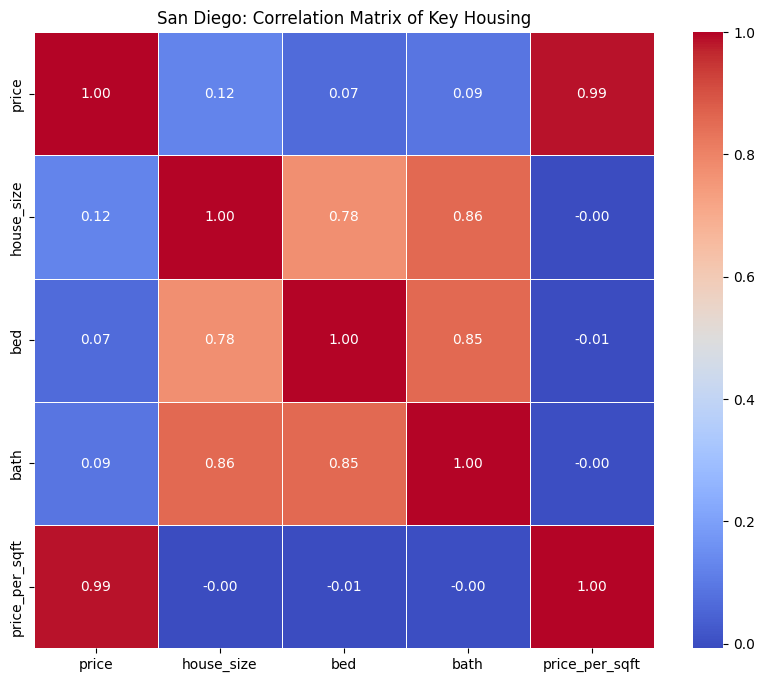

In [ ]:
# 1. Correlation Heatmap
# Select key numeric columns for analysis
numeric_cols = ['price', 'house_size', 'bed', 'bath', 'price_per_sqft',]
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('San Diego: Correlation Matrix of Key Housing')

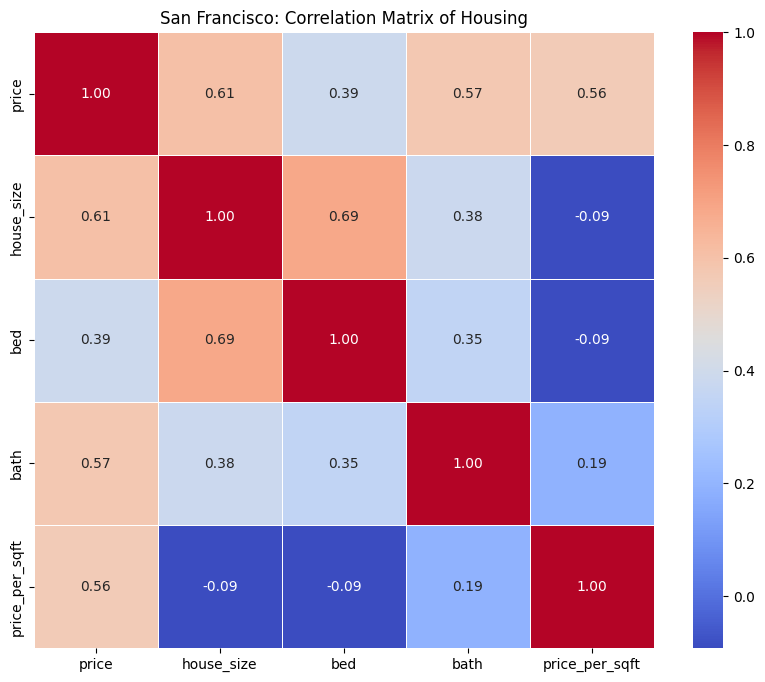

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sd_sf['price_per_sqft'] = df_sd_sf['price'] / df_sd_sf['house_size']


# Filter for San Francisco only
df_sf = df_sd_sf[df_sd_sf['city_label'] == 'San Francisco'].copy()

# Select key numeric columns
numeric_cols = ['price', 'house_size', 'bed', 'bath', 'price_per_sqft']
correlation_matrix_sf = df_sf[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_sf, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('San Francisco: Correlation Matrix of Housing')
plt.show()


# Graph 9 & 10

Question : How does the price per square foot vary with the number of bedrooms in San Diego and San Francisco, and what differences can be observed between the two cities?

Interpretation : Both cities show a clear negative relationship between the number of bedrooms and price per square foot: smaller homes, particularly those with two bedrooms, tend to have higher unit prices. In San Francisco, overall price levels are higher than in San Diego across all bedroom categories, reflecting the city’s tighter housing market and stronger demand pressure. Additionally, San Francisco displays a wider price spread, suggesting greater variability in housing prices, while San Diego’s distributions are comparatively narrower, indicating a more stable mid-range housing market.

Answer : Smaller homes command higher prices per square foot in both cities, but San Francisco’s housing market is notably more expensive and volatile. This comparison highlights how marke


/tmp/ipython-input-144269896.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


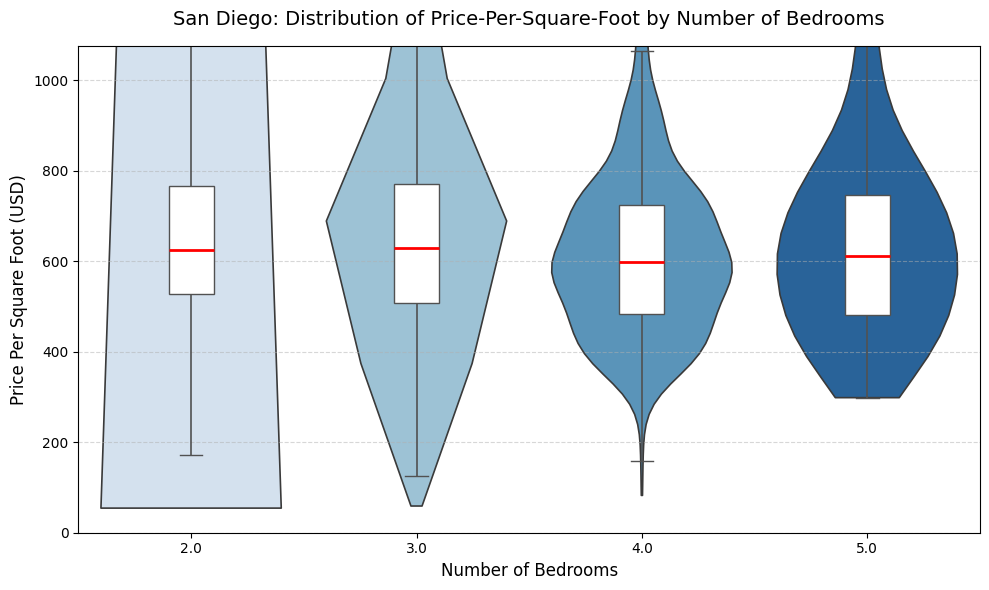

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df['city_label'] = df['city'].astype(str).str.strip().str.lower().map({
    'san diego': 'San Diego',
    'san francisco': 'San Francisco'
})

# Filter for San Diego and bedrooms 2–5
df_sd = df[(df['city_label'] == 'San Diego') & (df['bed'].isin([2, 3, 4, 5]))].copy()
plt.figure(figsize=(10, 6))
# Violin plot
sns.violinplot(
    data=df_sd,
    x='bed',
    y='price_per_sqft',
    inner=None,
    palette='Blues',
    cut=0,
    linewidth=1.2
)
# Overlay boxplot
sns.boxplot(
    data=df_sd,
    x='bed',
    y='price_per_sqft',
    width=0.2,
    showcaps=True,
    boxprops={'facecolor': 'white', 'zorder': 2},
    showfliers=False,
    whiskerprops={'linewidth': 1.2},
    medianprops={'color': 'red', 'linewidth': 2}
)
# Titles & labels
plt.title('San Diego: Distribution of Price-Per-Square-Foot by Number of Bedrooms', fontsize=14, pad=15)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Price Per Square Foot (USD)', fontsize=12)
plt.ylim(0, df_sd['price_per_sqft'].quantile(0.95))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2873068732.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


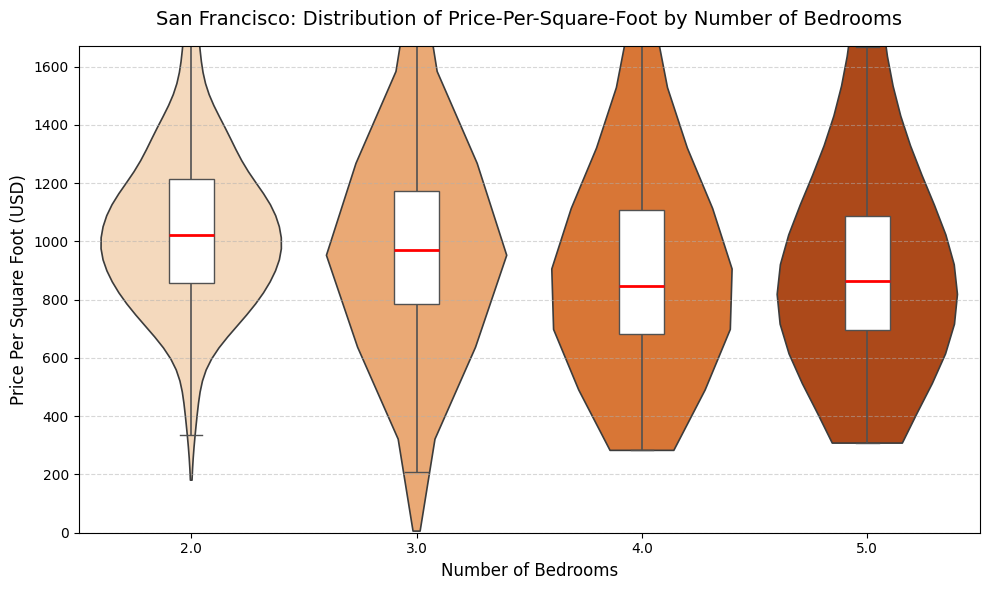

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# --- Filter for San Francisco (replace with San Diego if needed) ---
df_sf = df_sd_sf[
    (df_sd_sf['city_label'] == 'San Francisco') &
    (df_sd_sf['bed'].isin([2, 3, 4, 5]))
].copy()
# Drop invalid or missing price_per_sqft
df_sf = df_sf[np.isfinite(df_sf['price_per_sqft'])]
if not df_sf.empty:
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=df_sf,
        x='bed',
        y='price_per_sqft',
        inner=None,
        palette='Oranges',
        cut=0,
        linewidth=1.2
    )
    sns.boxplot(
        data=df_sf,
        x='bed',
        y='price_per_sqft',
        width=0.2,
        showcaps=True,
        boxprops={'facecolor': 'white', 'zorder': 2},
        showfliers=False,
        whiskerprops={'linewidth': 1.2},
        medianprops={'color': 'red', 'linewidth': 2}
    )
    plt.title('San Francisco: Distribution of Price-Per-Square-Foot by Number of Bedrooms',
              fontsize=14, pad=15)
    plt.xlabel('Number of Bedrooms', fontsize=12)
    plt.ylabel('Price Per Square Foot (USD)', fontsize=12)
    # Safe upper limit for Y-axis
    upper = df_sf['price_per_sqft'].quantile(0.95)
    if not np.isfinite(upper) or np.isnan(upper) or upper <= 0:
        upper = df_sf['price_per_sqft'].max() if np.isfinite(df_sf['price_per_sqft'].max()) else 1
    plt.ylim(0, upper)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("No valid data available for San Francisco in the specified bedroom range.")


# Graph 11 & 12

Question: What is the correlation between Median Home Price vs Max Affordability by ZIP?

Interpretation: For San Diego there is a low correlation with the relationship being weak and widely scattered dots. The confidence interval is widened as price increases showing that there is greater uncertainty. San Francisco has a positive relationship and stronger correlation showing that people are able to afford homes more than San Diego.

Answer: San Francisco has high income clusters that match the house prices in those areas. Whereas, San Diego growth of house prices is not matching the residents income making it more difficult for them to afford a home.


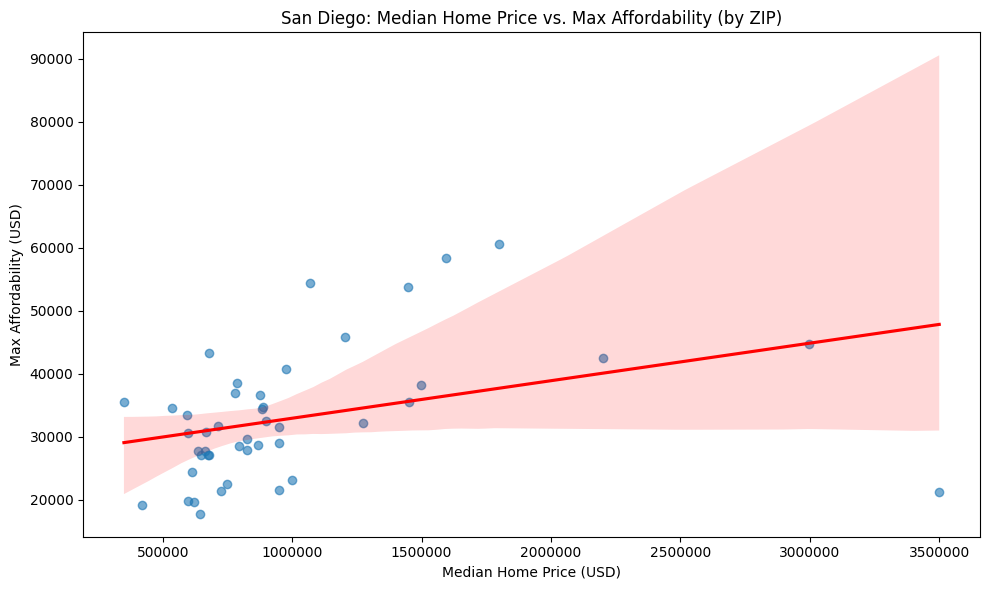

In [ ]:
# Filter for San Diego
df_sf = df_sd_sf[df_sd_sf['city_label'] == 'San Diego'].copy()
# Group by ZIP and compute medians
zip_medians_sf = df_sf.groupby('zip_code').agg(
    median_price=('price', 'median'),
    max_affordability=('max_affordability', 'median')
).reset_index()
# Regression plot: Median Home Price vs Max Affordability
plt.figure(figsize=(10, 6))
sns.regplot(x='median_price', y='max_affordability', data=zip_medians_sf,
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('San Diego: Median Home Price vs. Max Affordability (by ZIP)')
plt.xlabel('Median Home Price (USD)')
plt.ylabel('Max Affordability (USD)')
plt.ticklabel_format(style='plain', axis='both')
plt.tight_layout()
plt.show()


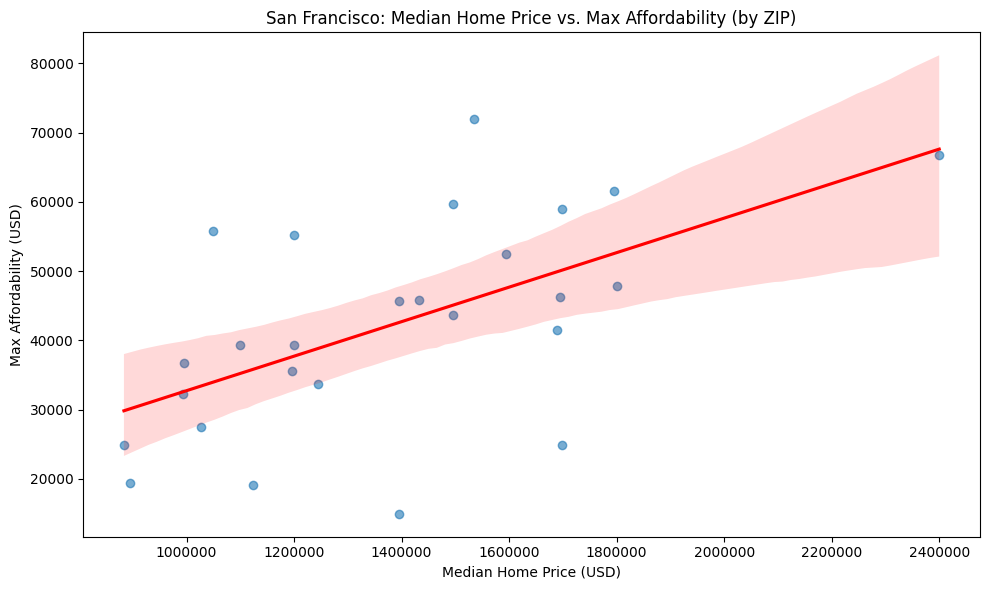

In [ ]:
# Filter for San Francisco
df_sf = df_sd_sf[df_sd_sf['city_label'] == 'San Francisco'].copy()

# Group by ZIP and compute medians
zip_medians_sf = df_sf.groupby('zip_code').agg(
    median_price=('price', 'median'),
    max_affordability=('max_affordability', 'median')
).reset_index()

# Regression plot: Median Home Price vs Max Affordability
plt.figure(figsize=(10, 6))
sns.regplot(x='median_price', y='max_affordability', data=zip_medians_sf,
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})

plt.title('San Francisco: Median Home Price vs. Max Affordability (by ZIP)')
plt.xlabel('Median Home Price (USD)')
plt.ylabel('Max Affordability (USD)')
plt.ticklabel_format(style='plain', axis='both')
plt.tight_layout()
plt.show()


# Graph 13

Question : What does the relationship between Median Price per Square Foot and Calculated Max Affordable Home Price indicate for San Diego ZIP codes?

Answer : The plot shows a negative or flat correlation between affordability and price per square foot. As the median price per sq ft increases, the calculated affordability does not rise proportionally and may even decrease.

Interpretation : This implies that in San Diego, higher housing prices per sq ft are not matched by higher household incomes — affordability declines in expensive ZIP codes.
The concentration of data points below the trend line suggests that many ZIP codes exceed what the median income can reasonably afford, indicating affordability stress.
The overall median price per sq ft is lower than San Francisco’s, but affordability still varies sharply by area.


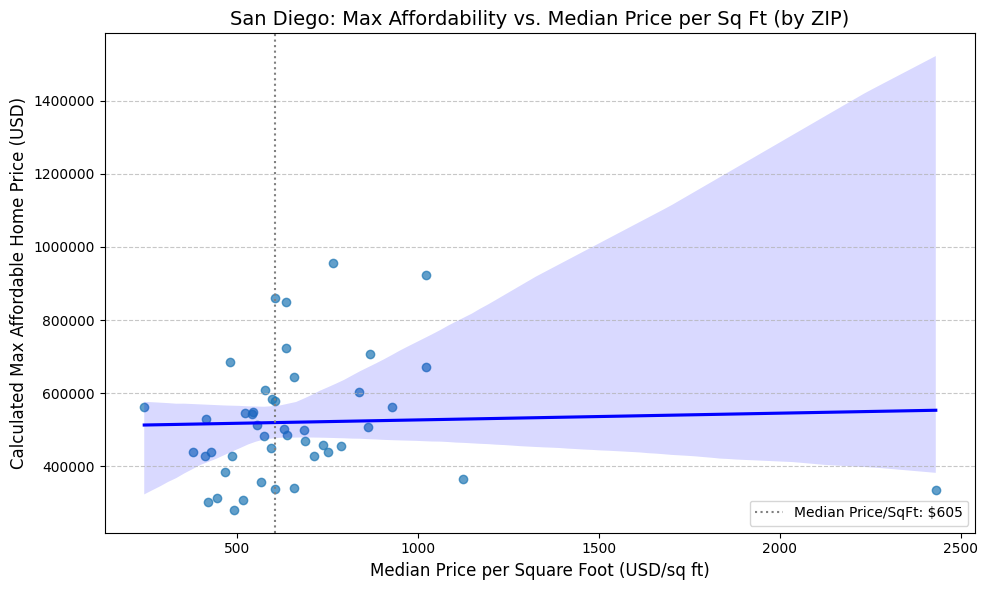

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Function to calculate affordability

def calculate_max_affordability(income, interest_rate=0.065, term_years=30, dti_ratio=0.36):
    monthly_income = income / 12
    max_monthly_payment = monthly_income * dti_ratio
    monthly_rate = interest_rate / 12
    n_payments = term_years * 12
    if monthly_rate == 0:
        return max_monthly_payment * n_payments
    return max_monthly_payment * ((1 - (1 + monthly_rate)**(-n_payments)) / monthly_rate)


df_sd = df_sd_sf[df_sd_sf['city_label'] == 'San Diego'].copy()
df_sd['price_sqft'] = df_sd['price'] / df_sd['house_size']
zip_sd = df_sd.groupby('zip_code').agg(
    median_income=('median_income', 'median'),
    median_price_sqft=('price_sqft', 'median')
).reset_index()
zip_sd['max_affordability'] = zip_sd['median_income'].apply(calculate_max_affordability)


#San Diego

plt.figure(figsize=(10, 6))
sns.regplot(
    x='median_price_sqft',
    y='max_affordability',
    data=zip_sd,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'blue'}
)
plt.axvline(zip_sd['median_price_sqft'].median(), color='gray', linestyle=':', linewidth=1.5,
            label=f'Median Price/SqFt: ${zip_sd["median_price_sqft"].median():,.0f}')
plt.title('San Diego: Max Affordability vs. Median Price per Sq Ft (by ZIP)', fontsize=14)
plt.xlabel('Median Price per Square Foot (USD/sq ft)', fontsize=12)
plt.ylabel('Calculated Max Affordable Home Price (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Graph 14

Question : What does the relationship between Median Price per Square Foot and Calculated Max Affordable Home Price indicate for San Francisco ZIP codes?

Answer : The plot shows a slightly positive correlation between affordability and median price per square foot. As home prices per sq ft increase, the maximum affordable home price also tends to increase slightly.

Interpretation : This suggests that in San Francisco, higher-priced ZIP codes also tend to have higher median incomes, allowing residents to afford more expensive homes.
However, the correlation is weak — the data points are widely scattered, showing substantial variability in affordability across ZIP codes, likely due to income disparities and differences in housing stock.
The median price per sq ft (~$1,017) indicates overall high housing costs, which still push affordability limits for most households despite higher incomes.

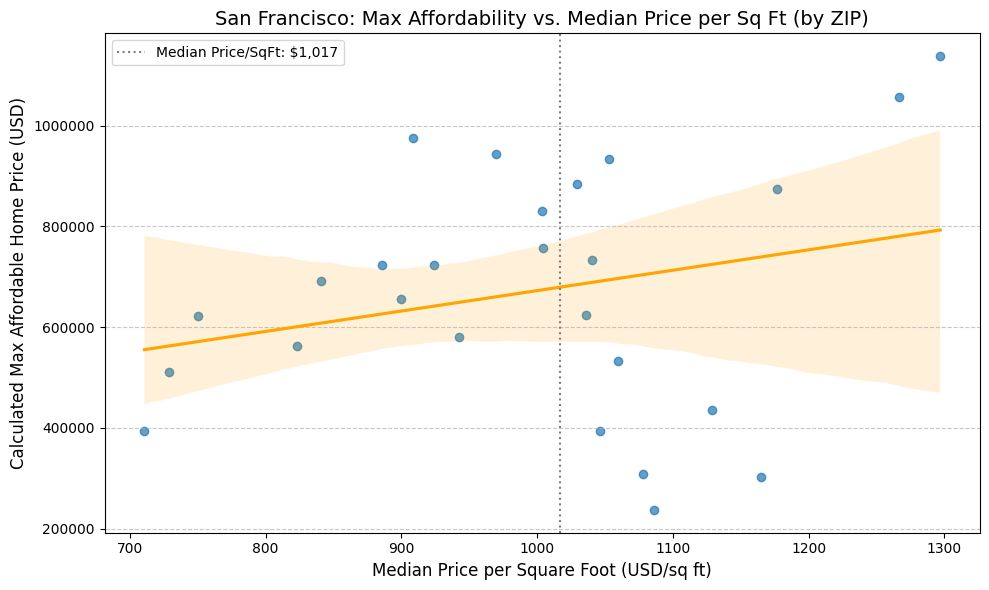

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Function to calculate affordability

def calculate_max_affordability(income, interest_rate=0.065, term_years=30, dti_ratio=0.36):
    monthly_income = income / 12
    max_monthly_payment = monthly_income * dti_ratio
    monthly_rate = interest_rate / 12
    n_payments = term_years * 12
    if monthly_rate == 0:
        return max_monthly_payment * n_payments
    return max_monthly_payment * ((1 - (1 + monthly_rate)**(-n_payments)) / monthly_rate)




df_sf = df_sd_sf[df_sd_sf['city_label'] == 'San Francisco'].copy()
df_sf['price_sqft'] = df_sf['price'] / df_sf['house_size']
zip_sf = df_sf.groupby('zip_code').agg(
    median_income=('median_income', 'median'),
    median_price_sqft=('price_sqft', 'median')
).reset_index()
zip_sf['max_affordability'] = zip_sf['median_income'].apply(calculate_max_affordability)


#San Francisco

plt.figure(figsize=(10, 6))
sns.regplot(
    x='median_price_sqft',
    y='max_affordability',
    data=zip_sf,
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'orange'}
)
plt.axvline(zip_sf['median_price_sqft'].median(), color='gray', linestyle=':', linewidth=1.5,
            label=f'Median Price/SqFt: ${zip_sf["median_price_sqft"].median():,.0f}')
plt.title('San Francisco: Max Affordability vs. Median Price per Sq Ft (by ZIP)', fontsize=14)
plt.xlabel('Median Price per Square Foot (USD/sq ft)', fontsize=12)
plt.ylabel('Calculated Max Affordable Home Price (USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x', useOffset=False)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#Graph 15 : Bedroom-to-Bathroom Ratio Comparison in San Diego vs San Francisco



Question:
What is the average bedroom-to-bathroom ratio in San Diego compared to San Francisco, and what might this reveal about housing layout and living conditions in the two cities?

Interpretation:
The bar chart highlights the mean bedroom to bathroom ratio in each city. San Diego shows a more balanced average, indicating that most homes tend to have a bathroom for nearly every bedroom. San Francisco, on the other hand, has a slightly higher average ratio, suggesting that many homes may have more bedrooms than bathrooms. This could reflect older housing stock, shared rentals, or urban space constraints where adding additional bathrooms is less feasible.

Answer:
San Diego homes offer greater parity between bedrooms and bathrooms, which may reflect modern, single-family home designs. San Francisco's higher ratio hints at compact or shared living arrangements, especially in high-cost urban areas. This metric helps identify differences in housing utility, space efficiency, and even potential comfort or crowding levels.



/tmp/ipython-input-614301679.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city_label', y='bed_bath_ratio', data=avg_ratio, palette=['skyblue', 'salmon'])


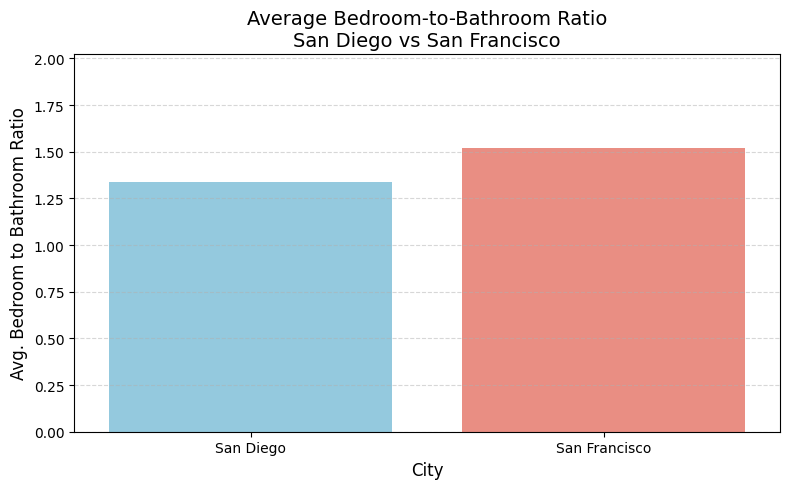

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Computing mean bedroom-to-bathroom ratio for each city
avg_ratio = df_ratio.groupby('city_label')['bed_bath_ratio'].mean().reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(x='city_label', y='bed_bath_ratio', data=avg_ratio, palette=['skyblue', 'salmon'])

plt.title('Average Bedroom-to-Bathroom Ratio\nSan Diego vs San Francisco', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Avg. Bedroom to Bathroom Ratio', fontsize=12)
plt.ylim(0, avg_ratio['bed_bath_ratio'].max() + 0.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Conclusion:

This project highlights the growing challenge of housing affordability in San Diego and San Francisco. We compared household incomes to home prices and price-per-square-foot, identifying which regions are most and least affordable. Our analysis shows that affordability gaps remain significant, with many households unable to meet the benchmark despite higher incomes in certain areas. We also found that property size is closely related to housing price, confirming that larger homes tend to carry a premium cost. These findings provide valuable insights for prospective homeowners to better plan financially and for policymakers to address affordability concerns. Future work could expand the analysis by integrating rental markets or exploring predictive models for long-term housing trends.


# Challenges
The main challenge was narrowing down our focus to one city, but then pivoting to add San Francisco to compare our data.

Choosing between mean, median, and mode required judgment. In skewed distributions (like house prices), the median was used

Our data had no granular info on home quality, amenities, year built, or renovation status, all of which heavily influence price and affordability.

# Actions:

Policymakers and city planners can use these insights to guide affordable housing initiatives, while individuals can use them to make more informed home-buying decisions.

# Risks/Limits:

The dataset is limited to recent listings and census averages, which may not capture fast-changing market dynamics or unique neighborhood conditions. Additionally, affordability Gap does not consider property features (e.g. amenities, quality of construction).

# Next Steps:

Future work could expand the analysis by including rental market data, historical housing price trends, and cost-of-living factors such as transportation. Developing predictive models would also help forecast affordability based on proposed zoning laws. There is also the possibility to explore other cities in California or other states to see how they compare with the data in San Diego/San Francisco. Another path to explore is comparing the current data to historical data. While older dates would be harder to find, We believe there would be enough data to explore the historical pattern to see how the Californian housing market has progressed.


# References + Generative AI disclosure

https://postalpro.usps.com/ZIP_Locale_Detail

The team made use of youtube videos to understand concepts and codes

This project made limited use of generative AI tools (ChatGPT) for language refinement, and sometimes troubleshooting errors that occurred in code.
